In [223]:
import logging
import sys
from io import open
from os import path
from time import time
from glob import glob
from gensim.models import Word2Vec
from six.moves import range, zip, zip_longest
from six import iterkeys
from collections import defaultdict, Iterable
import random
from random import shuffle
from itertools import product, permutations
from scipy.io import loadmat
from scipy.sparse import issparse
from io import open
import deepwalk
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import networkx as nx


In [224]:
# インプットするファイル名
INPUT = nx.karate_club_graph()

# アウトプットするファイル名
OUTPUT = "karate.txt"
# １ノードあたりに実行するウォーク数
NUMBER_WALKS = 10

# 1ウォークあたりの長さ
WALK_LENGTH = 20

# ランダムシード値
SEED = 0

# 埋め込み後の各ノードの次元数
REPRESENTATION_SIZE = 2

# skipgramので使われるウィンドウサイズ
WINDOW_SIZE = 5

# 並列プロセス数
WORKERS = 1

#クラスタ数
N_CLUSTER = 2


In [225]:
"""
    グラフ生成
    G = load_edgelist(ファイル名:String, 無効グラフかどうか:boolean)
    """
G = deepwalk.from_networkx(INPUT, True)
# ノード数出力
print("Number of nodes: {}".format(len(G.nodes())))

# ウォーク数算出(ノード数*1ノードあたりのウォーク数)と出力
num_walks = len(G.nodes()) * NUMBER_WALKS
print("Number of walks: {}".format(num_walks))

# データサイズ(ウォーク数*ウォークの長さ)の算出と出力
data_size = num_walks * WALK_LENGTH
print("Data size (walks*length): {}".format(data_size))

print("Walking Now!!!!!!")

# ウォーク取得(長さは全部等しい)
walks = deepwalk.build_deepwalk_corpus(G, num_paths=NUMBER_WALKS,
                              path_length=WALK_LENGTH, alpha=0, rand=random.Random())

print("Embedding Now!!!!!")
model = Word2Vec(walks, size=REPRESENTATION_SIZE,
                 window=WINDOW_SIZE, min_count=0, sg=1, hs=1, workers=WORKERS)

model.wv.save_word2vec_format(OUTPUT)

#全ベクトルを取得
vec = model.wv.__getitem__([str(i) for i in range(len(G))])


Number of nodes: 34
Number of walks: 170
Data size (walks*length): 3400
Walking Now!!!!!!
Embedding Now!!!!!


In [226]:
df = pd.DataFrame(data = vec)

In [227]:
print(df)

           0         1
0  -1.315981  0.052562
1  -1.149662  0.080981
2  -1.222548 -0.245193
3  -1.213401  0.288361
4  -1.371045  0.301243
5  -1.486876  0.112562
6  -1.603382  0.070741
7  -1.201280  0.156873
8  -1.116976 -0.061275
9  -1.103572 -0.015614
10 -1.486687  0.156566
11 -1.289660  0.039995
12 -1.212154  0.305297
13 -1.249105  0.098573
14 -1.094876 -0.293220
15 -1.136162 -0.035353
16 -1.563425  0.317530
17 -1.261623  0.150791
18 -1.120635 -0.024822
19 -1.182906 -0.122843
20 -1.020167  0.042389
21 -1.189896 -0.043142
22 -1.064626  0.017939
23 -1.181094  0.058716
24 -1.149068 -0.064063
25 -1.149272  0.241643
26 -1.064472 -0.199471
27 -1.193860 -0.150045
28 -1.124562 -0.072490
29 -1.210156 -0.531938
30 -1.125238 -0.191194
31 -1.160925  0.067273
32 -1.098988 -0.337940
33 -1.149160 -0.451041


In [228]:
#kemans実行
#data_array = np.array([df[0].tolist(),df[1].tolist()],np.float32)
#data_array = data_array.T

pred = KMeans(n_clusters=N_CLUSTER).fit_predict(vec)
df["cluster_id"] = pred


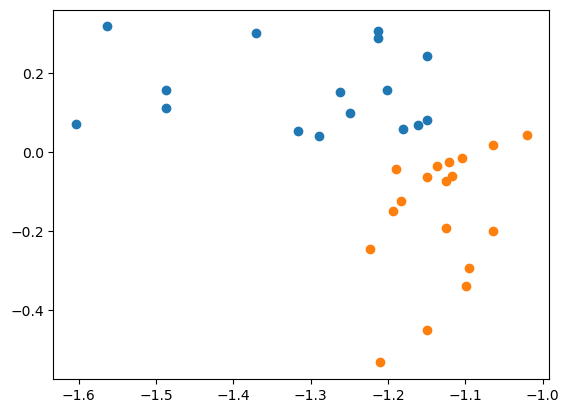

In [229]:
for i in df["cluster_id"].unique():
    tmp = df.loc[df["cluster_id"]==i]
    plt.scatter(tmp[0],tmp[1])